In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print("\nFirst 5 rows and 5 columns\n",raw .iloc[:5 , :5])

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713

First 5 rows and 5 columns
      Country Abbrev  Corruption  Peace  Legal
0    Albania     AL          35  1.821  4.546
1    Algeria     DZ          35  2.219  4.435
2  Argentina     AR          45  1.989  5.087
3    Armenia     AM          42  2.294  4.812
4  Australia     AU          77  1.419  8.363


In [3]:
# check for missing values
check = raw.isna().sum()
check

Country       0
Abbrev        0
Corruption    0
Peace         0
Legal         0
GDP Growth    0
dtype: int64

In [4]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


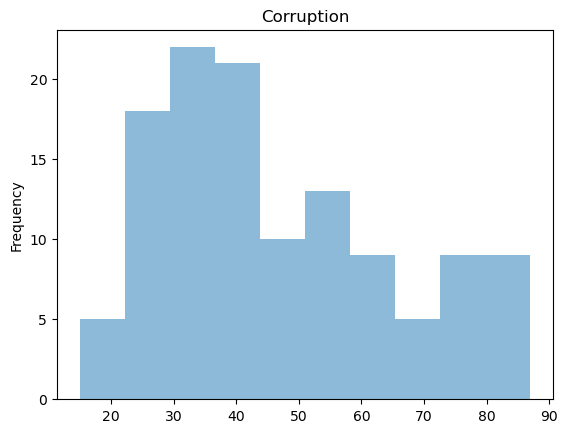

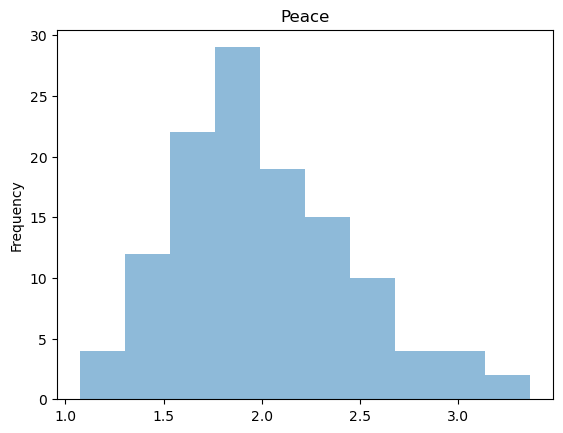

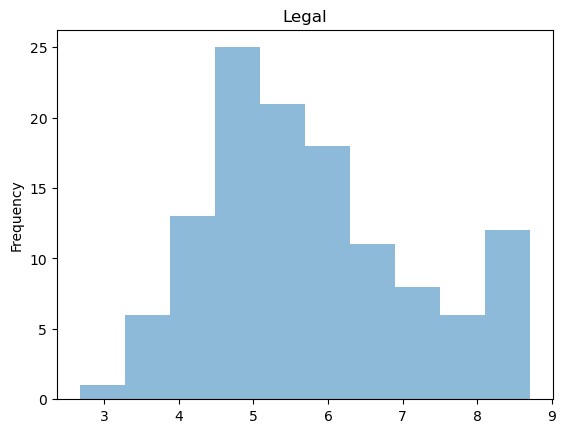

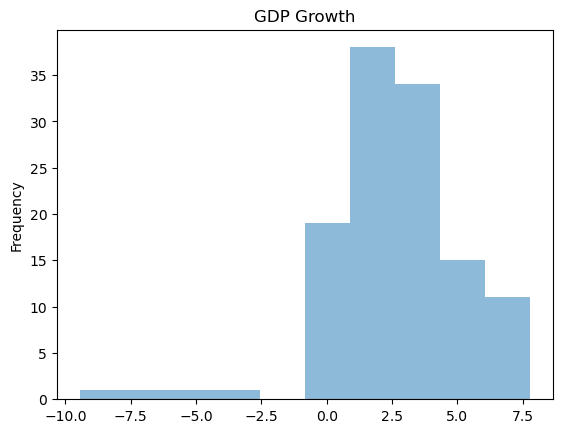

In [5]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

In [6]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


In [7]:
# Perform Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.3509139523852161
For n_clusters= 3 The average silhouette_score is : 0.3558522334350506
For n_clusters= 4 The average silhouette_score is : 0.3372449209416129
For n_clusters= 5 The average silhouette_score is : 0.34438420977393375
For n_clusters= 6 The average silhouette_score is : 0.34875382122984605
For n_clusters= 7 The average silhouette_score is : 0.3603542108728006
For n_clusters= 8 The average silhouette_score is : 0.3394917368960437
For n_clusters= 9 The average silhouette_score is : 0.3152647236003266
For n_clusters= 10 The average silhouette_score is : 0.3090796538425007


In [15]:
#K means with k=7
k = 7
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print cluster center
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

cluster centers:  [[ 0.20555045  0.52556914 -0.59243165]
 [ 0.25388748 -0.52823312  1.34995125]
 [-1.26104619  1.7919167  -0.52568349]
 [ 1.84989234 -1.05242316 -0.14505601]
 [ 0.70529573 -0.95894794 -3.43893096]
 [ 0.04538919 -0.6852538  -0.01515842]
 [-0.84739893  0.52786017  0.19939546]]
cluster labels:  [5 5 4 1 2 2 5 0 1 2 1 5 5 6 0 6 3 3 2 3 6 1 3 6 5 6 6 3 2 1 5 1 5 6 1 2 0
 5 1 2 1 5 5 5 6 2 1 1 4 6 0 0 0 2 0 5 1 0 0 6 3 5 6 1 5 6 3 1 6 3 5 5 5 5
 1 2 2 4 3 2 0 3 6 5 5 1 6 6 6 6 3 1 0 1 5 1 2 6 6 0 6 5 2 2 6 1 5 5 0 5 3
 1 3 0 2 0 0 1 3 5 4]


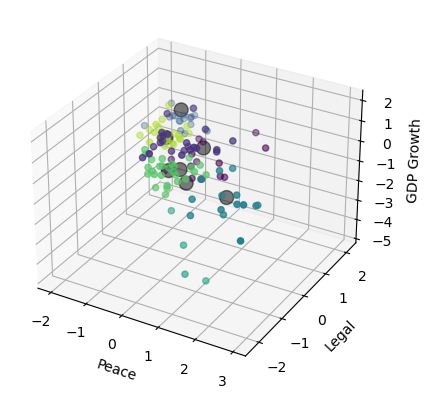

In [9]:
#Visualize the result (3D plot)
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()


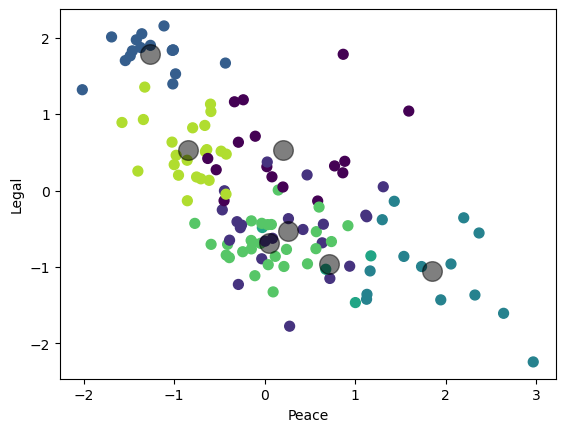

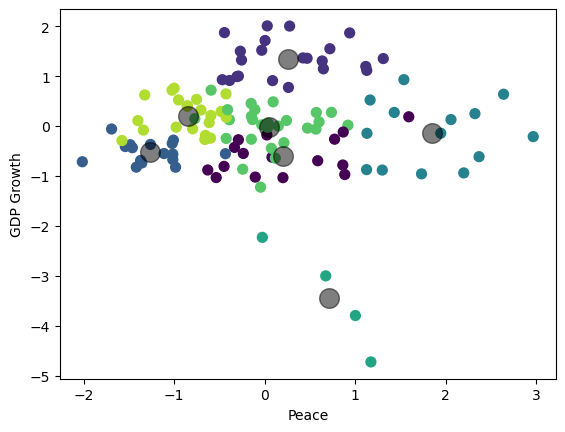

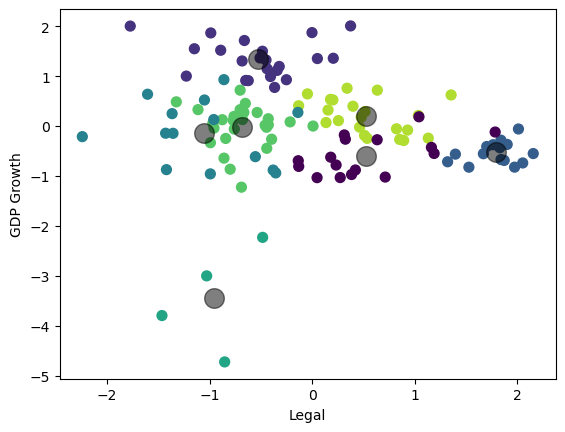

In [10]:
#Visualize the result (3 2D plots)
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

In [12]:
#List the result
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
58                         Kuwait     KW      0
52                        Jamaica     JM      0
51                          Italy     IT      0
50                         Israel     IL      0
57                  Korea (South)     KI      0
92                   Saudi Arabia     SA      0
36                         France     FR      0
99                   South Africa     ZA      0
54                         Jordan     JO      0
108           Trinidad and Tobago     TT      0
14                         Brazil     BR      0
113          United Arab Emirates     AE      0
80                           Oman     OM      0
115                 United States     US      0
116                       Uruguay     UY      0
7                         Bahrain     BH      0
117                       Vietnam     VI      1
3                         Armenia     AM      1
56                          Kenya     KE      1
85                    Philippines     PH

In [14]:
result.to_csv('results_kmeans_silouhette.csv') 